# Face Expression Detection Model building

# Backdrop

In [1]:
import pandas as pd

# load all images in a directory
from os import listdir
from matplotlib import image
from sklearn import preprocessing

%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import skimage

from sklearn.model_selection import train_test_split

# Importing necessary functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import shutil

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
def move_images(df, src, dest):
    for img in df['name'].values:
        shutil.copy(src + '\\' + img, dest + '\\' + img)


def get_expression(val):
    '''
    This Function is used to get the expression name mentioned in the image name
    
    Example:
        KA.NE1.26.tiff -> ExpressionName: NE
    '''
    return str(val)[str(val).find('.') + 1:str(val).find('.') + 3]


def get_expression_count(val):
    '''
    This Function is used to get the total number of expression name counts per person mentioned in the image name
    
    Example:
        KA.NE1.26.tiff -> Number of the respective expression: 1
    '''
    return str(val)[str(val).find('.') + 3:str(val).find('.') + 4]


def get_person_name(val):
    '''
    This Function is used to get the PersonName mentioned in the image name
    
    Example:
        KA.NE1.26.tiff -> PersonName: KA
    '''
    return str(val)[:str(val).find('.')]


def read_images(src_path):
    '''
    This function is used to read the images in the mentioned directory.
    
    Returns a list values of numpy arrays of the images and dataframe with image details from the name
    '''
    # load all images in a directory
    loaded_images = list()
    y = list()
    for filename in listdir(src_path):
        # load image
        img_data = image.imread(src_path + '\\' + filename)
        if (len(img_data.shape)) > 2:
            img_data = img_data[:, :, 0]
        # store loaded image
        loaded_images.append(img_data)
        y.append(filename)
    df = pd.DataFrame(y, columns=['name'])
    df['expression'] = df.applymap(lambda x: get_expression(x), )
    df['counter'] = df['name'].map(lambda x: get_expression_count(x), )
    df['person_name'] = df['name'].map(lambda x: get_person_name(x), )
    return loaded_images, df


def create_test_train(img_details_df,src_path,Train_path,Test_path,test_size_var):
    for person in img_details_df['person_name'].value_counts().keys():
        temp_df = img_details_df[img_details_df['person_name'] == person]
        X_temp = temp_df['name']
        y_temp = temp_df['expression']
        X_train, X_test, y_train, y_test = train_test_split(X_temp,
                                                            y_temp,
                                                            test_size=test_size_var,
                                                            stratify=y_temp,
                                                            random_state=2020,
                                                            shuffle=True)
        # Move images to respective folders
        for img_name in X_train:
            shutil.copy(src_path+ '\\' + img_name, Train_path+ '\\' + img_name)
        for img_name in X_test:
            shutil.copy(src_path+ '\\' + img_name, Test_path+ '\\' + img_name)

# Read all Images

In [3]:
source_images, img_details_df = read_images(r'C:\Users\samu0315\Downloads\Expression Data\Expression Data')

In [4]:
img_details_df

,name,expression,counter,person_name
0,KA.AN1.39.tiff,AN,1,KA
1,KA.AN2.40.tiff,AN,2,KA
2,KA.AN3.41.tiff,AN,3,KA
3,KA.DI1.42.tiff,DI,1,KA
4,KA.DI2.43.tiff,DI,2,KA
...,...,...,...,...
208,YM.SA2.56.tiff,SA,2,YM
209,YM.SA3.57.tiff,SA,3,YM
210,YM.SU1.58.tiff,SU,1,YM
211,YM.SU2.59.tiff,SU,2,YM


In [5]:
src_path = r'C:\Users\samu0315\Downloads\Expression Data\Expression Data'
Train_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Train_Images'
Test_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Test_Images'


create_test_train(img_details_df,src_path,Train_path,Test_path,7)

# Make Train and Test sets

In [6]:
train_images, train_df = read_images(Train_path)
train_df['image'] = train_images

test_images, test_df = read_images(Test_path)
test_df['image'] = test_images

In [7]:
test_df

,name,expression,counter,person_name,image
0,KA.AN1.39.tiff,AN,1,KA,"[[105, 102, 108, 118, 114, 117, 113, 122, 113,..."
1,KA.DI3.44.tiff,DI,3,KA,"[[130, 128, 118, 125, 119, 123, 136, 136, 125,..."
2,KA.FE4.48.tiff,FE,4,KA,"[[85, 82, 95, 85, 77, 79, 87, 82, 88, 85, 96, ..."
3,KA.HA4.32.tiff,HA,4,KA,"[[103, 89, 98, 106, 112, 109, 114, 109, 115, 1..."
4,KA.NE1.26.tiff,NE,1,KA,"[[131, 135, 134, 137, 143, 148, 151, 149, 158,..."
...,...,...,...,...,...
65,YM.FE4.70.tiff,FE,4,YM,"[[108, 110, 106, 101, 116, 102, 103, 111, 108,..."
66,YM.HA1.52.tiff,HA,1,YM,"[[140, 150, 154, 150, 157, 150, 154, 153, 149,..."
67,YM.NE1.49.tiff,NE,1,YM,"[[103, 104, 105, 114, 113, 116, 123, 113, 126,..."
68,YM.SA1.55.tiff,SA,1,YM,"[[170, 156, 165, 167, 172, 171, 170, 175, 165,..."


In [8]:
X_train=train_df['image']
y_train=pd.DataFrame(train_df['expression'])

X_test=test_df['image']
y_test=pd.DataFrame(test_df['expression'])

# Histogram Transformation

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


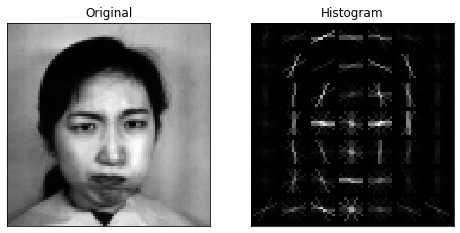

In [9]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread(r'C:\Users\samu0315\Downloads\Expression Data\Expression Data\KA.AN2.40.tiff', as_grey=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(12, 12),
    cells_per_block=(2,2),
    orientations=8,
    visualise=True,
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('Histogram')
plt.show()

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [11]:
def normalize_train_data(X):
    # create an instance of each transformer
    hogify = HogTransformer(
        pixels_per_cell=(8, 8),
        cells_per_block=(2,2),
        orientations=9,
        block_norm='L2-Hys'
    )
    scalify = StandardScaler()

    # call fit_transform on each transform converting X_train step by step
    X_hog = hogify.fit_transform(X)
    X_prepared = scalify.fit_transform(X_hog)
    X_prepared = pd.DataFrame(X_prepared)
    print(X_prepared.shape)
    return X_prepared

In [12]:
X_train_prepared = normalize_train_data(X_train)

(143, 34596)


In [13]:
X_test_prepared = normalize_train_data(X_test)

(70, 34596)


In [14]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_prepared, X_test_prepared, y_train, y_test)
models

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [09:00<00:00, 18.02s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.94,0.94,None,0.94,0.65
RidgeClassifier,0.94,0.94,None,0.94,0.64
LogisticRegression,0.94,0.94,None,0.94,4.65
PassiveAggressiveClassifier,0.91,0.91,None,0.91,3.69
Perceptron,0.90,0.90,None,0.90,1.31
LinearSVC,0.89,0.89,None,0.88,4.71
SGDClassifier,0.89,0.89,None,0.88,1.35
NuSVC,0.89,0.89,None,0.89,2.53
ExtraTreesClassifier,0.81,0.81,None,0.81,1.17


In [18]:
original_data_path = r'C:\Users\samu0315\Downloads\Expression Data\Expression Data'
aug_data_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\New_trian_data'

In [22]:
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(rotation_range=40,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             brightness_range=(0.5, 1.5))

for filename in listdir(original_data_path):
    shutil.copy(original_data_path+ '\\' + filename, aug_data_path+ '\\' + filename)
    img = load_img(original_data_path + '\\' + filename)
    # Converting the input sample image to an array
    x = img_to_array(img)
    # Reshaping the input image
    x = x.reshape((1, ) + x.shape)
    # Generating and saving 10 augmented samples
    # using the above defined parameters.
    i = 0
    for batch in datagen.flow(
            x,
            batch_size=1,
            save_to_dir=aug_data_path,
            save_prefix=filename,
            save_format='tiff'):
        i += 1
        if i > 10:
            break

In [23]:
src_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\New_trian_data'
Train_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Train_Images'
Test_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Test_Images'

source_images, img_details_df = read_images(src_path)
create_test_train(img_details_df,src_path,Train_path,Test_path,.2)

In [24]:
aug_train_images, aug_train_df = read_images(Train_path)
aug_train_df['image'] = aug_train_images

aug_test_images, aug_test_df = read_images(Test_path)
aug_test_df['image'] = aug_test_images

In [25]:
aug_X_train=aug_train_df['image']
aug_y_train=pd.DataFrame(aug_train_df['expression'])

aug_X_test=aug_test_df['image']
aug_y_test=pd.DataFrame(aug_test_df['expression'])

In [ ]:
aug_X_train_prepared = normalize_train_data(aug_X_train)

aug_X_test_prepared = normalize_train_data(aug_X_test)

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(aug_X_train_prepared, aug_X_test_prepared, aug_y_train, aug_y_test)
models

(2066, 34596)
(568, 34596)


 90%|█████████ | 27/30 [46:58<06:35, 131.84s/it] 